In [1]:
from snorkel.labeling import labeling_function
import json
import os
import numpy as np
import imageio.v2 as imageio
import sys
sys.path.append("../../")

from LF_library import *
from LF_deep_utils import *
from LF_utils import *

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, auc
from sklearn.metrics import precision_recall_curve
import numpy as np

def calculate_metrics(y_true, y_pred, y_scores=None, abstain_class=-1):
    # Filter out samples where prediction is -1
    valid_indices = y_pred != abstain_class
    y_true_filtered = y_true[valid_indices]
    y_pred_filtered = y_pred[valid_indices]
    # y_scores_fileterd = y_scores[valid_indices]

    # Compute metrics
    if y_scores is not None:
        precision_list, recall_list, threshold = precision_recall_curve(y_true, y_scores)
        auc_score = auc(recall_list, precision_list)
    else:
        precision_list, recall_list, threshold = precision_recall_curve(y_true, y_pred)
        auc_score = auc(recall_list, precision_list)
    conf_matrix = confusion_matrix(y_true_filtered, y_pred_filtered)
    precision = precision_score(y_true_filtered, y_pred_filtered)
    recall = recall_score(y_true_filtered, y_pred_filtered)
    f1 = f1_score(y_true_filtered, y_pred_filtered)
    accuracy = accuracy_score(y_true_filtered, y_pred_filtered)

    return {
        'Confusion Matrix': conf_matrix,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy,
        'auc': auc_score
    }

In [3]:
# import json

# # File paths
# file1_path = './vlm_responses/finla_results_llama3.2-vision_90b.json'
# file2_path = './vlm_responses/test_data/test_results_llama3.2-vision_90b.json'
# output_path = './vlm_responses/llama_merged.json'

# # Load the JSON files
# with open(file1_path, 'r') as file1:
#     data1 = json.load(file1)

# with open(file2_path, 'r') as file2:
#     data2 = json.load(file2)

# # Modify keys in the second JSON
# modified_data2 = {f"Dev-{key}": value for key, value in data2.items()}

# # Merge the dictionaries
# merged_data = {**data1, **modified_data2}

# # Save the merged dictionary into a new JSON file
# with open(output_path, 'w') as output_file:
#     json.dump(merged_data, output_file, indent=4)

# print(f"Merged JSON saved to {output_path}")


# Defining the Labelers

In [3]:
POSITIVE = 1
NEGATIVE = 0
ABSTAIN = -1

@labeling_function()
def Llama32_Vision_Solo(image_name):
    file_path = './llama3.2-vision-90b-labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name] if data[image_name] is not None else -1

@labeling_function()
def Llama32_Vision_Solo_Test(image_name):
    file_path = './test_data/llama3.2-vision-90b-labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name] if data[image_name] is not None else -1

@labeling_function()
def Qwen7B(image_name):
    file_path = './qwen2.5vl:7b_labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name] if data[image_name] is not None else -1

@labeling_function()
def Qwen7B_Test(image_name):
    file_path = './test_data/qwen2.5vl-7b-labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name] if data[image_name] is not None else -1  

@labeling_function()
def Qwen72B(image_name):
    file_path = './qwen2.5vl-72b-labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name] if data[image_name] is not None else -1

@labeling_function()
def Qwen72B_Test(image_name):
    file_path = './test_data/qwen2.5vl-72b-labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name] if data[image_name] is not None else -1 

@labeling_function()
def Llama4_Scout(image_name):
    file_path = './llama4-scout-labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name]['class_label'] if image_name in data.keys() and data[image_name]['class_label'] is not None else -1

@labeling_function()
def Llama4_Scout_Test(image_name):
    file_path = './test_data/llama4-scout-labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name]['class_label'] if image_name in data.keys() and data[image_name]['class_label'] is not None else -1

@labeling_function()
def Llama32_Vision_Multi_Question(image_name):
    file_path = './llama3.2-vision-90b-llama3.2-vision-90b-multi-question-labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name]['class_label'] if image_name in data.keys() and data[image_name]['class_label'] is not None else -1

@labeling_function()
def Llama32_Vision_Multi_Question_Test(image_name):
    file_path = './test_data/llama3.2-vision-90b-llama3.2-vision-90b-multi-question-labels.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    return data[image_name]['class_label'] if image_name in data.keys() and data[image_name]['class_label'] is not None else -1 

In [4]:
file_path = './test_data/llama3.2-vision-90b-llama3.2-vision-90b-multi-question-labels.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [5]:
label = '106'
label in data.keys()

False

In [6]:
Llama32_Vision_Multi_Question_Test('106')

-1

In [13]:
Llama4_Scout_Test("300")

1

In [7]:
# train_data_json_path = './vlm_responses/finla_results_llama3.2-vision_90b.json'
# # dev_data_json_path = '../prompting_framework/prompting_results/hateful/simplified_dev.json'

# with open(train_data_json_path, 'r') as file:
#     train_data = json.load(file)

# # Extract and pad image names, ensuring they are 5 digits long before the '.png'
# train_image_names = []
# for key in train_data:
#     print(key)
#     print(train_data[key])
#     break

# Train Dataset

In [7]:
train_data_json_path = './llama3.2-vision-90b-labels.json'
dev_data_json_path = '../../../labeling_tool/v2_results/final/agg/neg_strict_labels_majority.json'

with open(train_data_json_path, 'r') as file:
    train_data = json.load(file)

# Extract and pad image names, ensuring they are 5 digits long before the '.png'
train_image_names = []
for entry in train_data:
    # img_name, ext = entry['img'].split('.')
    # padded_img_name = img_name.zfill(5)  # Pad the image name to 5 digits
    train_image_names.append(str(entry))

with open(dev_data_json_path, 'r') as file:
    dev_data = json.load(file)
    
dev_image_names = []
Y_dev = []
for entry in dev_data:
    if dev_data[entry] is not None:
        Y_dev.append(dev_data[entry]) 
    
        dev_image_names.append(entry)
    
print(f"There are {len(train_image_names)} images in the Train set.")
print(f"There are {len(dev_image_names)} images in the dev set.")
print(f"There are {len(Y_dev)} labels in the dev set.")


There are 18179 images in the Train set.
There are 484 images in the dev set.
There are 484 labels in the dev set.


In [9]:
Qwen72B_Test(dev_image_names[0])

1

# Applying the LFs

In [8]:
from snorkel.labeling import LFApplier

list_of_all_the_models = [
                'Llama32_Vision_Multi_Question_Test',
                # 'Llama4_Scout_Test',
                'Llama32_Vision_Solo_Test',
                'Qwen72B_Test',
                # 'Qwen7B_Test'
       ]

test_lfs = [
    Llama32_Vision_Multi_Question_Test,
    # Llama4_Scout_Test,
    Llama32_Vision_Solo_Test,
    Qwen72B_Test,
    # Qwen7B_Test
       ]

train_lfs = [
    Llama32_Vision_Multi_Question,
    # Llama4_Scout,
    Llama32_Vision_Solo,
    Qwen72B,
    # Qwen7B
       ]

test_applier = LFApplier(test_lfs)
train_applier = LFApplier(train_lfs)

In [9]:
from snorkel.labeling import LFAnalysis

L_dev = test_applier.apply(dev_image_names)
# L_train = train_applier.apply(train_image_names)

# np.save('./eurosat_L_dev_embedding.npy',L_dev)
# np.save('/home/macula/SMATousi/Desktop/WS_Gully_L_train.npy',L_train)
L_train = np.load('/home/macula/SMATousi/Desktop/WS_Gully_L_train.npy')

484it [00:02, 181.84it/s]


In [10]:
Y_dev = np.array(Y_dev)
LFAnalysis(L_dev, test_lfs).lf_summary(Y=Y_dev)

,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
Llama32_Vision_Multi_Question_Test,0,"[0, 1]",0.876033,0.876033,0.555785,241,183,0.568396
Llama32_Vision_Solo_Test,1,"[0, 1]",1.000000,1.000000,0.613636,294,190,0.607438
Qwen72B_Test,2,"[0, 1]",1.000000,1.000000,0.613636,316,168,0.652893


In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score

# Example ground truth and predictions for six models
# Replace these arrays with actual predictions from each model
y_true = Y_dev
predictions = {}

for i in range(L_dev.shape[1]):
    predictions[list_of_all_the_models[i]] = L_dev[:,i]
    
# Create a DataFrame to store confusion matrix results and metrics
confusion_data = []

for model_name, y_pred in predictions.items():
    
    y_pred = np.array(y_pred)
    # Confusion Matrix
    metrics = calculate_metrics(Y_dev, y_pred)
    
    tn, fp, fn, tp = metrics['Confusion Matrix'].ravel()
    precision = metrics['Precision']
    recall = metrics['Recall']
    f1 = metrics['F1 Score']
    accuracy = metrics['Accuracy']
    # Append data
    confusion_data.append([
        model_name, tn, fp, fn, tp, 
        recall, precision, accuracy, f1
    ])

# Convert to a DataFrame for display
confusion_df = pd.DataFrame(confusion_data, columns=[
    'Model', 'True Negative', 'False Positive', 'False Negative', 'True Positive', 
    'Recall', 'Precision', 'Accuracy', 'F1 Score'
])

# Display the table with confusion matrix and metrics
confusion_df

,Model,True Negative,False Positive,False Negative,True Positive,Recall,Precision,Accuracy,F1 Score
0,Llama32_Vision_Multi_Question_Test,61,136,47,180,0.792952,0.569620,0.568396,0.662983
1,Llama32_Vision_Solo_Test,187,40,150,107,0.416342,0.727891,0.607438,0.529703
2,Qwen72B_Test,102,125,43,214,0.832685,0.631268,0.652893,0.718121


# Optimization for Label Model

In [28]:
from snorkel.labeling.model import LabelModel

label_model = LabelModel(cardinality=2, verbose=False)
label_model.fit(L_train, Y_dev, n_epochs=100, log_freq=500, seed=12)

from snorkel.analysis import metric_score
from snorkel.utils import probs_to_preds

# probs_dev = label_model.predict_proba(L_dev)
# preds_dev = probs_to_preds(probs_dev)

preds_dev = label_model.predict(L_dev)

metrics = calculate_metrics(Y_dev, preds_dev)
for metric, value in metrics.items():
    print(f"{metric}: {value}")

100%|████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2740.41epoch/s]

Confusion Matrix: [[116 111]
 [ 62 195]]
Precision: 0.6372549019607843
Recall: 0.7587548638132295
F1 Score: 0.6927175843694494
Accuracy: 0.6425619834710744
auc: 0.7620544696638664


In [29]:
Y_train = label_model.predict(L_train)

LFAnalysis(L_train, train_lfs).lf_summary(Y=Y_train)

,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
Llama32_Vision_Multi_Question,0,"[0, 1]",1.0,1.0,0.67985,14902,3277,0.819737
Llama32_Vision_Solo,1,"[0, 1]",1.0,1.0,0.67985,12501,5678,0.687662
Qwen72B,2,"[0, 1]",1.0,1.0,0.67985,14773,3406,0.812641


In [30]:
label_model.save('./trained_snorkel_label_model_Gully.pkl')

In [31]:
label_model.load('./trained_snorkel_label_model_Gully.pkl')

/home/macula/SMATousi/.conda/envs/snorkel/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [46]:
train_proba = label_model.predict_proba(L_train)
train_labels = label_model.predict(L_train)

label_model_results = {}

for i, image_name in enumerate(train_image_names):

    label_model_results[image_name] = {}

    label_model_results[image_name]['proba'] = train_proba[i,:].tolist()
    label_model_results[image_name]['label'] = str(train_labels[i])

In [47]:
label_model_results

{'18108': {'proba': [0.14340367830227807, 0.8565963216977219], 'label': '1'},
 '8885': {'proba': [0.14340367830227807, 0.8565963216977219], 'label': '1'},
 '5096': {'proba': [0.574362593457957, 0.4256374065420429], 'label': '0'},
 '15513': {'proba': [0.574362593457957, 0.4256374065420429], 'label': '0'},
 '4707': {'proba': [0.574362593457957, 0.4256374065420429], 'label': '0'},
 '7682': {'proba': [0.9160560362381008, 0.0839439637618992], 'label': '0'},
 '14796': {'proba': [0.14340367830227807, 0.8565963216977219], 'label': '1'},
 '16425': {'proba': [0.14340367830227807, 0.8565963216977219], 'label': '1'},
 '3590': {'proba': [0.574362593457957, 0.4256374065420429], 'label': '0'},
 '19142': {'proba': [0.574362593457957, 0.4256374065420429], 'label': '0'},
 '17223': {'proba': [0.14340367830227807, 0.8565963216977219], 'label': '1'},
 '17421': {'proba': [0.574362593457957, 0.4256374065420429], 'label': '0'},
 '3734': {'proba': [0.574362593457957, 0.4256374065420429], 'label': '0'},
 '19682

In [48]:
import json
with open('train_lable_model_results.json', 'w', encoding='utf-8') as f:
    json.dump(label_model_results, f)

In [73]:
label_model.get_conditional_probs()[0,:,:]

array([[7.07030296e-04, 0.00000000e+00],
       [5.80712557e-01, 9.99999975e-05],
       [4.18580443e-01, 9.99899983e-01]])

In [32]:
label_model.get_conditional_probs()

array([[[-6.36432171e-02,  5.44126034e-02],
        [ 7.67485440e-01,  2.29477629e-01],
        [ 2.96157777e-01,  7.16109753e-01]],

       [[ 0.00000000e+00,  3.00559998e-02],
        [ 9.99989986e-01,  9.12638426e-01],
        [ 9.99999975e-06,  5.73055856e-02]],

       [[-6.23567104e-02,  5.32210469e-02],
        [ 7.60730207e-01,  2.25640714e-01],
        [ 3.01626444e-01,  7.21138239e-01]]])

In [44]:
label_model.coverage

array([1., 1., 1.])

In [46]:
accs = np.zeros(label_model.m)
cprobs = label_model.get_conditional_probs()
for i in range(label_model.m):
    accs[i] = np.diag(cprobs[i, 1:, :] @ label_model.P.cpu().detach().numpy()).sum()
print(np.clip(accs / label_model.coverage, 1e-6, 1.0))

[0.79965815 0.73787287 0.72284487]


In [51]:
cprobs[0, 1:, :]

array([[5.99416316e-01, 9.99999975e-05],
       [4.00585055e-01, 9.99899983e-01]])

In [52]:
label_model.P

tensor([[0.5000, 0.0000],
        [0.0000, 0.5000]])

In [50]:
cprobs[0, 1:, :] @ label_model.P.cpu().detach().numpy()

array([[2.99708158e-01, 4.99999987e-05],
       [2.00292528e-01, 4.99949992e-01]])

In [25]:
label_model._get_augmented_label_matrix(L_dev).shape

(311, 10)

In [21]:
label_model.predict_proba(L_dev)

array([[5.15538063e-02, 9.48446194e-01],
       [9.99987975e-01, 1.20249290e-05],
       [9.99685090e-01, 3.14910415e-04],
       [2.45985546e-02, 9.75401445e-01],
       [2.45985546e-02, 9.75401445e-01],
       [1.29973258e-01, 8.70026742e-01],
       [7.35542335e-01, 2.64457665e-01],
       [2.45985546e-02, 9.75401445e-01],
       [3.71946584e-02, 9.62805342e-01],
       [5.15538063e-02, 9.48446194e-01],
       [7.35542335e-01, 2.64457665e-01],
       [3.71946584e-02, 9.62805342e-01],
       [3.71946584e-02, 9.62805342e-01],
       [5.02980746e-01, 4.97019254e-01],
       [3.71946584e-02, 9.62805342e-01],
       [3.71946584e-02, 9.62805342e-01],
       [9.99685090e-01, 3.14910415e-04],
       [9.99685090e-01, 3.14910415e-04],
       [9.99974082e-01, 2.59178118e-05],
       [7.35542335e-01, 2.64457665e-01],
       [9.99764864e-01, 2.35135694e-04],
       [2.45985546e-02, 9.75401445e-01],
       [2.45985546e-02, 9.75401445e-01],
       [7.35542335e-01, 2.64457665e-01],
       [7.355423

Experimenting with different number of LFs

In [12]:
all_f1s = []
number_of_epochs = 100
for i in range(3, L_train.shape[1]+1):

    
    label_model = LabelModel(cardinality=2, verbose=False)
    label_model.fit(L_train[:,:i], Y_dev, n_epochs=number_of_epochs, log_freq=500, seed=12)
    
    probs_dev = label_model.predict_proba(L_dev[:,:i])
    preds_dev = probs_to_preds(probs_dev)

    metrics = calculate_metrics(Y_dev, preds_dev)
    all_f1s.append(metrics['F1 Score'])
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print(f'trained with the LFs = {list_of_all_the_models[:i]}')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2996.96epoch/s]


NameError: name 'probs_to_preds' is not defined

In [ ]:
import matplotlib.pyplot as plt
x = np.array([4, 5, 6])

plt.figure(figsize=(8, 5))
plt.plot(x, all_f1s, marker='s', linestyle='-', color='b')
plt.title(f'The Label Model Performance After Optimizing For {number_of_epochs} Iterations')
plt.xlabel('Number of LFs')
plt.ylabel('F1 Score')
plt.grid(True)
# plt.savefig('HM_LM_1000_4-7.png')
plt.show()

In [26]:
all_f1s = []
# number_of_epochs = [10, 20, 50, 80, 100, 500, 1000, 5000]
number_of_epochs = range(20,100)
for epochs in number_of_epochs:

    
    label_model = LabelModel(cardinality=2, verbose=False)
    label_model.fit(L_train, Y_dev, n_epochs=epochs, log_freq=500, seed=12)
    
    probs_dev = label_model.predict_proba(L_dev)
    preds_dev = probs_to_preds(probs_dev)

    metrics = calculate_metrics(Y_dev, preds_dev)
    all_f1s.append(metrics['Accuracy'])
    # for metric, value in metrics.items():
    #     print(f"{metric}: {value}")
    # print(f'trained with the LFs = {list_of_all_the_models[:i]}')

100%|██████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 4622.52epoch/s]


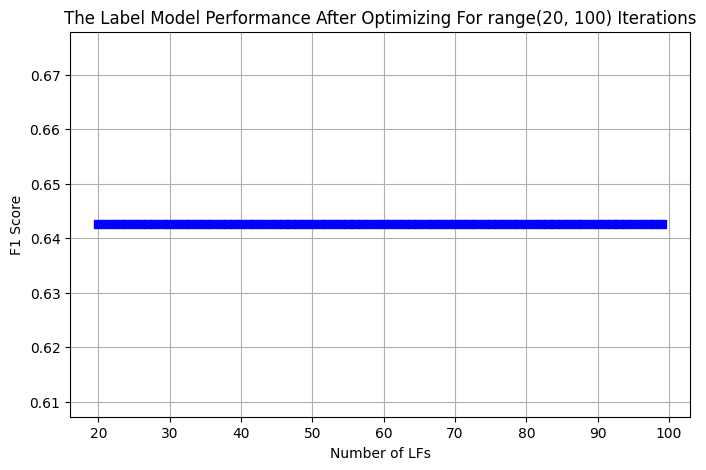

In [27]:
import matplotlib.pyplot as plt
x = np.array(number_of_epochs)

plt.figure(figsize=(8, 5))
plt.plot(x, all_f1s, marker='s', linestyle='-', color='b')
plt.title(f'The Label Model Performance After Optimizing For {number_of_epochs} Iterations')
plt.xlabel('Number of LFs')
plt.ylabel('F1 Score')
plt.grid(True)
# plt.savefig('HM_LM_1000_4-7.png')
plt.show()

In [ ]:
all_f1s[1:]

# Training the End Model

The dataloader for PyTorch

In [15]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Custom dataset class for loading images
class ImageDataset(Dataset):
    def __init__(self, image_names, root_dir, labels, target_dists, val=False, transform=None):
        """
        Args:
            image_names (list): List of image file names.
            root_dir (string): Directory where images are stored.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.data = []
        self.tile_numbers = []
        self.val = val
        
        self.image_names = image_names
        self.root_dir = root_dir
        self.labels = labels
        self.transform = transform
        self.target_dists = target_dists
        tile_files = [f for f in os.listdir(self.root_dir) if f.endswith('.tif')]
        # neg_files = [f for f in os.listdir(neg_dir) if f.endswith('.tif')]
        tile_dict = self.group_files_by_tile(tile_files)
        
        self.store_tiles(tile_dict, self.root_dir)

    
    def group_files_by_tile(self, files):
        tile_dict = {}
        # print(len(files))
        for file in files:
            tile_number = file.split('_')[-1].split('.')[0]
            if tile_number not in tile_dict:
                tile_dict[tile_number] = []
            tile_dict[tile_number].append(file)
        # Only include complete groups
        # return [tile for tile in tile_dict.values() if len(tile) == 6]
        # return [tile for tile in tile_dict.values()]
        # print(tile_dict)
        return tile_dict

    def store_tiles(self, tile_dict, directory):
        for tile_number in self.image_names:
            # print("----")
            # print(tile_number)
           
            self.data.append([os.path.join(directory, f) for f in sorted(tile_dict[tile_number])])

            # else:
            #     self.data.append([os.path.join(directory, f) for f in sorted(tile_dict[])])
            self.tile_numbers.append(tile_number)
    
    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Build the full path of the image file
        # img_name = os.path.join(self.root_dir, self.image_names[idx])
        # label = self.labels[idx]
        # target_dist = self.target_dists[idx]
        # image = Image.open(img_name).convert('RGB')  # Load image as RGB

        # # Apply any transformations (e.g., resize, normalization)
        # if self.transform:
        #     image = self.transform(image)
        
        image_paths = self.data[idx]
        images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
        images = [transforms.functional.to_pil_image(image) for image in images_1]
        if self.transform:
            images = [self.transform(image) for image in images]

        label = self.labels[idx]
        target_dist = self.target_dists[idx]
        
        tile_number = self.tile_numbers[idx]
        # label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return images, torch.tensor(label), torch.tensor(target_dist), tile_number, image_paths

        # return image, torch.tensor(label), torch.tensor(target_dist)

In [38]:

root_dir = "/home/macula/SMATousi/Gullies/ground_truth/organized_data/All_Pos_Neg/combined_folder_true_rgb/"
validation_root_dir = "/home/macula/SMATousi/cluster/docker-images/ollama/MO+IA_test_data_numbered/"

transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to 224x224 (example)
        transforms.ToTensor(),          # Convert images to PyTorch tensors
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet mean/std
    ])

probs_dev = label_model.predict_proba(L_train)
label_model_predictions = probs_to_preds(probs_dev)

In [39]:
dev_image_names_modified = [entry.split('-')[-1] for entry in dev_image_names]
print(dev_image_names_modified)

['415', '1020', '105', '439', '914', '1099', '1065', '373', '166', '396', '837', '685', '226', '956', '70', '604', '1067', '118', '774', '521', '910', '975', '352', '761', '1007', '428', '1038', '50', '838', '126', '1078', '944', '532', '1041', '540', '128', '722', '478', '639', '668', '343', '1021', '552', '848', '74', '520', '1032', '615', '536', '1117', '646', '390', '923', '194', '216', '99', '372', '857', '335', '505', '972', '727', '1064', '740', '182', '316', '706', '193', '882', '932', '174', '440', '965', '1140', '273', '878', '826', '596', '1123', '1031', '942', '239', '1005', '139', '11', '855', '836', '97', '124', '568', '387', '171', '644', '695', '12', '739', '732', '1035', '242', '441', '928', '71', '248', '794', '458', '915', '475', '1050', '546', '556', '619', '721', '614', '626', '404', '759', '334', '486', '153', '5', '1010', '272', '219', '125', '222', '1098', '758', '213', '235', '916', '253', '573', '636', '1053', '927', '398', '231', '502', '410', '4', '895', '34

In [40]:
dataset = ImageDataset(image_names=train_image_names, 
                       root_dir=root_dir, 
                       labels=label_model_predictions, 
                       target_dists=probs_dev, 
                       transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=0)

dev_dataset = ImageDataset(image_names=dev_image_names_modified, 
                           root_dir=validation_root_dir, 
                           labels=Y_dev, 
                           target_dists=probs_dev,
                           transform=transform)
dev_dataloader = DataLoader(dev_dataset, batch_size=8, shuffle=False, num_workers=0)

In [ ]:
train_iter = iter(dataloader)

images, label, target_dists, tile_number, image_paths = next(train_iter)

In [ ]:
tile_number

A basic ResNet

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch
import torch.nn.functional as F

def expected_cross_entropy_loss(logits, target_distributions):
    """
    Computes the expected cross-entropy loss for a batch of predictions and target distributions.

    Parameters:
    logits (torch.Tensor): The raw output from the model of shape (batch_size, num_classes).
    target_distributions (torch.Tensor): The target class distributions of shape (batch_size, num_classes),
                                         where each row is a probability distribution over classes.

    Returns:
    torch.Tensor: The expected cross-entropy loss.
    """
    # Convert logits to log probabilities
    log_probs = F.log_softmax(logits, dim=1)
    
    # Compute the element-wise product between target distributions and log probabilities
    # Then, sum across classes to get the cross-entropy for each instance
    cross_entropy = -torch.sum(target_distributions * log_probs, dim=1)
    
    # Take the mean over the batch
    loss = cross_entropy.mean()
    
    return loss


In [42]:
from tqdm import tqdm
def calculate_metrics(y_true, y_pred, abstain_class=-1):
    # Filter out samples where prediction is -1
    # valid_indices = y_pred != abstain_class
    # y_true_filtered = y_true[valid_indices]
    # y_pred_filtered = y_pred[valid_indices]

    # Compute metrics
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    return {
        'Confusion Matrix': conf_matrix,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    }


# Function to evaluate the model on the dev set
def evaluate(model, dev_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_preds = []

    with torch.no_grad():  # Disable gradient computation
        for images, labels, target_dist, _, _ in tqdm(dev_loader):
            labels =  labels.to(device)
            list_of_images = [image.to(device) for image in images]

            # Forward pass to get outputs
            outputs = model(list_of_images)

            # Get predictions (class with the highest score)
            # _, predicted = torch.max(outputs.data, 1)
            predicted = torch.round(outputs)

            # Store true labels and predictions
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)
    
def train(model, train_loader, val_loader, criterion, optimizer, device, epochs):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels, target_dist, _, _ in tqdm(train_loader):
            labels, target_dist = labels.to(device), target_dist.to(device)
            # print(labels)
            list_of_images = [image.to(device) for image in images]

            optimizer.zero_grad()  # Clear the gradients

            outputs = model(list_of_images)  # Forward pass
            # print(outputs)
            
            # print(outputs)
            # print(outputs.dtype)
            # print(labels)
            # probs, predicted = torch.max(outputs.data, 1)
            # max_prob = torch.max(probs)
            loss = criterion(outputs.squeeze(), labels.float())  # Compute the loss
            # loss = expected_cross_entropy_loss(outputs, target_dist)

            loss.backward()  # Backward pass
            optimizer.step()  # Update the weights

            # Calculate running loss and accuracy
            running_loss += loss.item()
            
            predicted = torch.round(outputs.data)
            # print(predicted)
            
            # print(predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # break

        epoch_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")
        labels, predictions = evaluate(model, val_loader, device)
        # print(labels)
        # print(predictions)

        # Calculate and print precision, recall, and F1-score
        # calculate_metrics(labels, predictions)
        metrics = calculate_metrics(labels, predictions)
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


In [43]:
torch.cuda.empty_cache()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = 'cpu'

resnet_extractor = ResNetFeatureExtractor()
mlp_classifier = MLPClassifier(input_size=6*2048, hidden_size=512, output_size=1)

model = Gully_Classifier(input_size=6*2048, hidden_size=512, output_size=1).to(device)
# model = Gully_Classifier(input_size=6*2048, hidden_size=512, output_size=1)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

# Loss and optimizer
criterion = nn.BCELoss()  # Binary classification loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Only optimize the MLP parameters

# Train the model
epochs = 10
train(model, dataloader, dev_dataloader, criterion, optimizer, device, epochs)


/home/macula/SMATousi/.conda/envs/snorkel/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/macula/SMATousi/.conda/envs/snorkel/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the curr

Epoch [1/10], Loss: 0.5384, Accuracy: 406.72%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:33<00:00,  1.16it/s]


Confusion Matrix: [[ 94  40]
 [ 52 125]]
Precision: 0.7575757575757576
Recall: 0.7062146892655368
F1 Score: 0.7309941520467836
Accuracy: 0.7041800643086816


  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1065/1065 [17:06<00:00,  1.04it/s]


Epoch [2/10], Loss: 0.6944, Accuracy: 420.99%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:26<00:00,  1.47it/s]
/home/macula/SMATousi/.conda/envs/snorkel/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix: [[134   0]
 [177   0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.43086816720257237


  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1065/1065 [16:10<00:00,  1.10it/s]


Epoch [3/10], Loss: 0.6635, Accuracy: 424.91%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:32<00:00,  1.19it/s]


Confusion Matrix: [[ 40  94]
 [ 39 138]]
Precision: 0.5948275862068966
Recall: 0.7796610169491526
F1 Score: 0.6748166259168704
Accuracy: 0.572347266881029


  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1065/1065 [16:13<00:00,  1.09it/s]


Epoch [4/10], Loss: 0.5372, Accuracy: 427.52%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:30<00:00,  1.30it/s]


Confusion Matrix: [[ 72  62]
 [ 41 136]]
Precision: 0.6868686868686869
Recall: 0.768361581920904
F1 Score: 0.7253333333333334
Accuracy: 0.6688102893890675


  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1065/1065 [16:01<00:00,  1.11it/s]


Epoch [5/10], Loss: 0.4877, Accuracy: 427.21%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:29<00:00,  1.32it/s]


Confusion Matrix: [[ 56  78]
 [ 38 139]]
Precision: 0.6405529953917051
Recall: 0.7853107344632768
F1 Score: 0.7055837563451777
Accuracy: 0.6270096463022508


  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1065/1065 [16:34<00:00,  1.07it/s]


Epoch [6/10], Loss: 0.4527, Accuracy: 431.91%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:35<00:00,  1.11it/s]


Confusion Matrix: [[ 89  45]
 [ 54 123]]
Precision: 0.7321428571428571
Recall: 0.6949152542372882
F1 Score: 0.7130434782608696
Accuracy: 0.6816720257234726


  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1065/1065 [15:53<00:00,  1.12it/s]


Epoch [7/10], Loss: 0.4248, Accuracy: 432.47%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:31<00:00,  1.24it/s]


Confusion Matrix: [[ 91  43]
 [ 69 108]]
Precision: 0.7152317880794702
Recall: 0.6101694915254238
F1 Score: 0.6585365853658537
Accuracy: 0.639871382636656


  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1065/1065 [17:12<00:00,  1.03it/s]


Epoch [8/10], Loss: 0.3873, Accuracy: 433.25%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:29<00:00,  1.34it/s]


Confusion Matrix: [[ 66  68]
 [ 33 144]]
Precision: 0.6792452830188679
Recall: 0.8135593220338984
F1 Score: 0.7403598971722365
Accuracy: 0.6752411575562701


  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1065/1065 [16:27<00:00,  1.08it/s]


Epoch [9/10], Loss: 0.3595, Accuracy: 436.02%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:30<00:00,  1.26it/s]


Confusion Matrix: [[ 65  69]
 [ 22 155]]
Precision: 0.6919642857142857
Recall: 0.8757062146892656
F1 Score: 0.773067331670823
Accuracy: 0.707395498392283


  0%|                                                                                                                   | 0/1065 [00:00<?, ?it/s]/tmp/ipykernel_3257828/1289081151.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_1 = [imageio.imread(img_path).astype('uint8') for img_path in self.data[idx]]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1065/1065 [17:28<00:00,  1.02it/s]


Epoch [10/10], Loss: 0.3204, Accuracy: 439.70%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:27<00:00,  1.41it/s]

Confusion Matrix: [[ 82  52]
 [ 40 137]]
Precision: 0.7248677248677249
Recall: 0.7740112994350282
F1 Score: 0.7486338797814208
Accuracy: 0.7041800643086816


Evaluation ...

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Function to evaluate the model on the dev set
def evaluate(model, dev_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_preds = []

    with torch.no_grad():  # Disable gradient computation
        for images, labels, target_dist in tqdm(dev_loader):
            images, labels = images.to(device), labels.to(device)

            # Forward pass to get outputs
            outputs = model(images)

            # Get predictions (class with the highest score)
            _, predicted = torch.max(outputs.data, 1)

            # Store true labels and predictions
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)

# Function to calculate precision, recall, and F1 score
def calculate_metrics(labels, predictions):
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return precision, recall, f1

In [ ]:
dev_dataset = ImageDataset(image_names=dev_image_names, root_dir=root_dir, labels=Y_dev, target_dists=probs_dev, transform=transform)
dev_dataloader = DataLoader(dev_dataset, batch_size=8, shuffle=False, num_workers=4)

In [ ]:
labels, predictions = evaluate(model, dev_dataloader, device)

# Calculate and print precision, recall, and F1-score
# calculate_metrics(labels, predictions)
metrics = calculate_metrics(labels, predictions)
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Training the CLIP+MLP model